# MH Sampling Algorithm

**Import required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

**Define multivariate normal function**

In [2]:
def MvNormal(x, mu, sigma2):
    x = np.array(x)
    mu = np.array(mu)
    if isinstance(sigma2, float):
        sigma2 = sigma2*np.eye(2)
    else:
        sigma2 = np.array(sigma2)
    return np.exp(-(x-mu)@np.linalg.inv(sigma2)@(x-mu)/2)/(2*np.pi*np.sqrt(np.linalg.det(sigma2)))

**Define p(z) using above function**

In [3]:
def p(z):
    return MvNormal(z, [4, 4], [[1, 0.8],[0.8, 1]])

**Define q(z, z', $\sigma^2$)**

In [4]:
def q(z, z_, sigma2):
    return MvNormal(z, z_, sigma2)

**MH Sampling algorithm**

In [5]:
sigma2 = [0.01, 1.0, 100.0]
z_ = [0, 0]
samples = np.zeros((3, 10000, 2))
for i in range(3):
    for j in range(10000):
        z = np.random.multivariate_normal(z_, sigma2[i]*np.eye(2))
        u = np.random.uniform()
        A_ = (p(z)*q(z_, z, sigma2[i]))/(p(z_)*q(z, z_, sigma2[i]))
        A = min(1, A_)
        if u < A:
            samples[i, j] = z
        else:
            samples[i][j] = z_
        z_ = samples[i][j]

**Define space for plotting**

In [6]:
x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
space= np.meshgrid(x_range, y_range)
orig_samples = np.random.multivariate_normal([4, 4], [[1, 0.8],[0.8, 1]], 10000)

**Plot the samples for different n_samples**

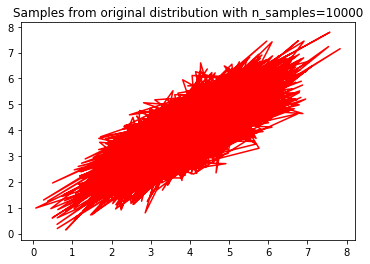

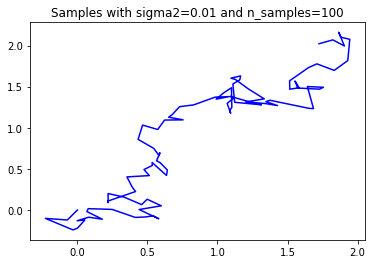

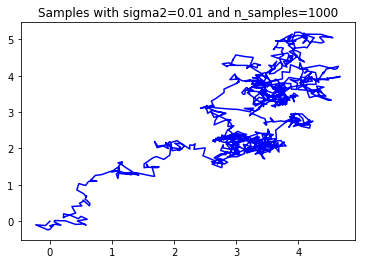

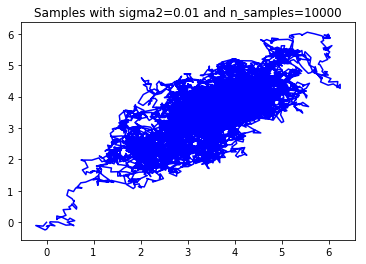

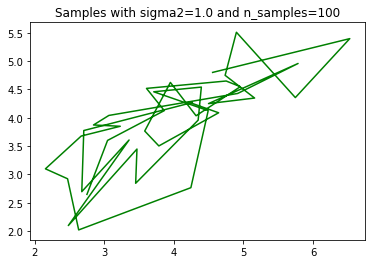

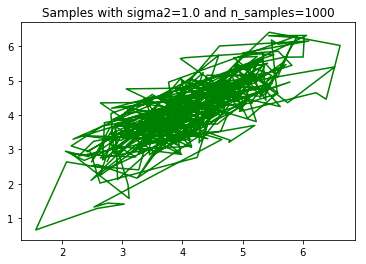

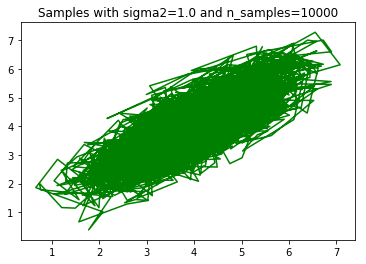

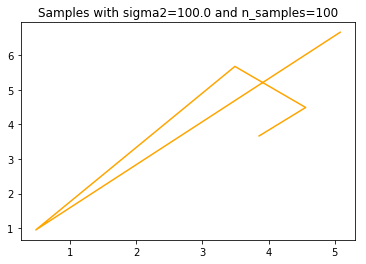

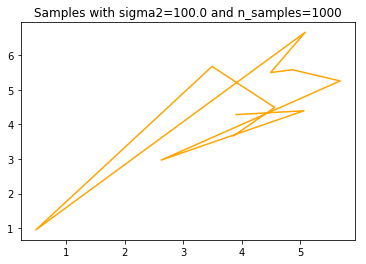

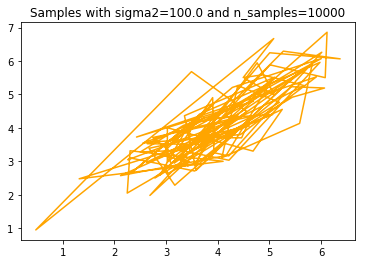

In [7]:
plt.plot(orig_samples[:, 0], orig_samples[:, 1], color='red')
title = 'Samples from original distribution with n_samples='+str(10000)
plt.title(title)
plt.savefig(title+'.png')
plt.show()
n_samples = [100, 1000, 10000]
color=['blue', 'green', 'orange']
for i in range(3):
    for j in range(3):
        plt.plot(samples[i,:n_samples[j],0], samples[i,:n_samples[j],1], color=color[i])
        title = 'Samples with sigma2='+str(sigma2[i])+' and n_samples='+str(n_samples[j])
        plt.title(title)
        plt.savefig(title+'.png')
        plt.show()